# Importing necessary libraries

In [1]:
from docx import Document
import string
import re
import nltk
from nltk import sent_tokenize, word_tokenize, pos_tag
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
import numpy as np
import matplotlib.image as mpimg
import matplotlib.colors as colors
import colorsys

# Reading the file
Solutions_of_poverty.docx - The document is a Word file that focuses on the various solutions to poverty, with a primary emphasis on the skills development.

In [2]:
# reading the file and file contents
doc = Document('Solutions_of_poverty.docx')
doc

In [3]:
text_solutions = "" # creation of an empty string to store the content of the doc

# converting the content of the doc into a string
for paragraph in doc.paragraphs:
    text_solutions = text_solutions + paragraph.text + "\n"

In [4]:
text_solutions # displaying the file contents

"Solutions for eradicating poverty\nThe fight against global poverty can be a discouraging one. The number of people suffering is hard to imagine for most middle-class families. While there is a multitude of poverty-stricken individuals, things are not entirely bleak. Poverty rates have been falling in recent years, and the word is getting out. People can make a difference in this fight with the right approach. There are answers on how to solve poverty, and time is showing us just how effective they are.\nSkill development is a powerful antidote to poverty, and when we talk about skill development, we're referring to a holistic approach that centers on skill development at its core. Skill development empowers individuals with the competencies needed to secure gainful employment, elevating them from the clutches of poverty. By focusing on skill development, individuals gain practical expertise that makes them more employable and enhances their income-earning potential. Skill development

# Converting into Lower Case

In [5]:
# Transforming the string into lowercase using lower() function
text_solutions = text_solutions.lower()
text_solutions

"solutions for eradicating poverty\nthe fight against global poverty can be a discouraging one. the number of people suffering is hard to imagine for most middle-class families. while there is a multitude of poverty-stricken individuals, things are not entirely bleak. poverty rates have been falling in recent years, and the word is getting out. people can make a difference in this fight with the right approach. there are answers on how to solve poverty, and time is showing us just how effective they are.\nskill development is a powerful antidote to poverty, and when we talk about skill development, we're referring to a holistic approach that centers on skill development at its core. skill development empowers individuals with the competencies needed to secure gainful employment, elevating them from the clutches of poverty. by focusing on skill development, individuals gain practical expertise that makes them more employable and enhances their income-earning potential. skill development

# Removing Punctuations

In [6]:
# Remove all punctuation characters from the text
text_solutions = text_solutions.translate(str.maketrans('', '', string.punctuation))
text_solutions

'solutions for eradicating poverty\nthe fight against global poverty can be a discouraging one the number of people suffering is hard to imagine for most middleclass families while there is a multitude of povertystricken individuals things are not entirely bleak poverty rates have been falling in recent years and the word is getting out people can make a difference in this fight with the right approach there are answers on how to solve poverty and time is showing us just how effective they are\nskill development is a powerful antidote to poverty and when we talk about skill development were referring to a holistic approach that centers on skill development at its core skill development empowers individuals with the competencies needed to secure gainful employment elevating them from the clutches of poverty by focusing on skill development individuals gain practical expertise that makes them more employable and enhances their incomeearning potential skill development programs equip indi

# Removing unwanted characters using RE

In [7]:
# The pattern '[\n|\xa0]' matches either a newline or a non-breaking space character
res1 = re.findall(r'[\n|\xa0]', text_solutions) 
res1

['\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n']

In [8]:
# Matched patterns are replaced by a single whitespace character
text_solutions = re.sub(r'[\n|\xa0]', ' ',text_solutions)
text_solutions

'solutions for eradicating poverty the fight against global poverty can be a discouraging one the number of people suffering is hard to imagine for most middleclass families while there is a multitude of povertystricken individuals things are not entirely bleak poverty rates have been falling in recent years and the word is getting out people can make a difference in this fight with the right approach there are answers on how to solve poverty and time is showing us just how effective they are skill development is a powerful antidote to poverty and when we talk about skill development were referring to a holistic approach that centers on skill development at its core skill development empowers individuals with the competencies needed to secure gainful employment elevating them from the clutches of poverty by focusing on skill development individuals gain practical expertise that makes them more employable and enhances their incomeearning potential skill development programs equip indivi

In [9]:
# Matches one or more consecutive digits
res2 = re.findall(r'\d+', text_solutions) 
res2

[]

In [10]:
# Matched patterns are replaced by a single whitespace character
text_solutions = re.sub(r'\d+', ' ',text_solutions)
text_solutions

'solutions for eradicating poverty the fight against global poverty can be a discouraging one the number of people suffering is hard to imagine for most middleclass families while there is a multitude of povertystricken individuals things are not entirely bleak poverty rates have been falling in recent years and the word is getting out people can make a difference in this fight with the right approach there are answers on how to solve poverty and time is showing us just how effective they are skill development is a powerful antidote to poverty and when we talk about skill development were referring to a holistic approach that centers on skill development at its core skill development empowers individuals with the competencies needed to secure gainful employment elevating them from the clutches of poverty by focusing on skill development individuals gain practical expertise that makes them more employable and enhances their incomeearning potential skill development programs equip indivi

In [11]:
# Matches two or more consecutive whitespace characters
res3 = re.findall(r'\s{2,}', text_solutions) 
res3

['  ', '  ']

In [12]:
# Matched patterns are replaced by a single whitespace character
text_solutions = re.sub(r'\s{2,}', ' ',text_solutions)
text_solutions

'solutions for eradicating poverty the fight against global poverty can be a discouraging one the number of people suffering is hard to imagine for most middleclass families while there is a multitude of povertystricken individuals things are not entirely bleak poverty rates have been falling in recent years and the word is getting out people can make a difference in this fight with the right approach there are answers on how to solve poverty and time is showing us just how effective they are skill development is a powerful antidote to poverty and when we talk about skill development were referring to a holistic approach that centers on skill development at its core skill development empowers individuals with the competencies needed to secure gainful employment elevating them from the clutches of poverty by focusing on skill development individuals gain practical expertise that makes them more employable and enhances their incomeearning potential skill development programs equip indivi

# Word Tokenization

In [13]:
# 'word_tokenize()' function to tokenize the text into words
tokens_solution = word_tokenize(text_solutions)
tokens_solution

['solutions',
 'for',
 'eradicating',
 'poverty',
 'the',
 'fight',
 'against',
 'global',
 'poverty',
 'can',
 'be',
 'a',
 'discouraging',
 'one',
 'the',
 'number',
 'of',
 'people',
 'suffering',
 'is',
 'hard',
 'to',
 'imagine',
 'for',
 'most',
 'middleclass',
 'families',
 'while',
 'there',
 'is',
 'a',
 'multitude',
 'of',
 'povertystricken',
 'individuals',
 'things',
 'are',
 'not',
 'entirely',
 'bleak',
 'poverty',
 'rates',
 'have',
 'been',
 'falling',
 'in',
 'recent',
 'years',
 'and',
 'the',
 'word',
 'is',
 'getting',
 'out',
 'people',
 'can',
 'make',
 'a',
 'difference',
 'in',
 'this',
 'fight',
 'with',
 'the',
 'right',
 'approach',
 'there',
 'are',
 'answers',
 'on',
 'how',
 'to',
 'solve',
 'poverty',
 'and',
 'time',
 'is',
 'showing',
 'us',
 'just',
 'how',
 'effective',
 'they',
 'are',
 'skill',
 'development',
 'is',
 'a',
 'powerful',
 'antidote',
 'to',
 'poverty',
 'and',
 'when',
 'we',
 'talk',
 'about',
 'skill',
 'development',
 'were',
 'ref

# Removing stopwords

In [14]:
list_of_stopwords = stopwords.words('English') # storing the stopwords in a list
list_of_stopwords 

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
# Filters out stopwords from the 'tokens_solution' list
tokens_solution = [word for word in tokens_solution if word not in list_of_stopwords]
tokens_solution

['solutions',
 'eradicating',
 'poverty',
 'fight',
 'global',
 'poverty',
 'discouraging',
 'one',
 'number',
 'people',
 'suffering',
 'hard',
 'imagine',
 'middleclass',
 'families',
 'multitude',
 'povertystricken',
 'individuals',
 'things',
 'entirely',
 'bleak',
 'poverty',
 'rates',
 'falling',
 'recent',
 'years',
 'word',
 'getting',
 'people',
 'make',
 'difference',
 'fight',
 'right',
 'approach',
 'answers',
 'solve',
 'poverty',
 'time',
 'showing',
 'us',
 'effective',
 'skill',
 'development',
 'powerful',
 'antidote',
 'poverty',
 'talk',
 'skill',
 'development',
 'referring',
 'holistic',
 'approach',
 'centers',
 'skill',
 'development',
 'core',
 'skill',
 'development',
 'empowers',
 'individuals',
 'competencies',
 'needed',
 'secure',
 'gainful',
 'employment',
 'elevating',
 'clutches',
 'poverty',
 'focusing',
 'skill',
 'development',
 'individuals',
 'gain',
 'practical',
 'expertise',
 'makes',
 'employable',
 'enhances',
 'incomeearning',
 'potential',
 '

# Lemmatization

In [16]:
# Creating an instance of the WordNetLemmatizer
lemma = nltk.WordNetLemmatizer()

# lemmatizes each word in the 'tokens_solution' list
lemma_tokens_solution = [lemma.lemmatize(i) for i in tokens_solution]
lemma_tokens_solution

['solution',
 'eradicating',
 'poverty',
 'fight',
 'global',
 'poverty',
 'discouraging',
 'one',
 'number',
 'people',
 'suffering',
 'hard',
 'imagine',
 'middleclass',
 'family',
 'multitude',
 'povertystricken',
 'individual',
 'thing',
 'entirely',
 'bleak',
 'poverty',
 'rate',
 'falling',
 'recent',
 'year',
 'word',
 'getting',
 'people',
 'make',
 'difference',
 'fight',
 'right',
 'approach',
 'answer',
 'solve',
 'poverty',
 'time',
 'showing',
 'u',
 'effective',
 'skill',
 'development',
 'powerful',
 'antidote',
 'poverty',
 'talk',
 'skill',
 'development',
 'referring',
 'holistic',
 'approach',
 'center',
 'skill',
 'development',
 'core',
 'skill',
 'development',
 'empowers',
 'individual',
 'competency',
 'needed',
 'secure',
 'gainful',
 'employment',
 'elevating',
 'clutch',
 'poverty',
 'focusing',
 'skill',
 'development',
 'individual',
 'gain',
 'practical',
 'expertise',
 'make',
 'employable',
 'enhances',
 'incomeearning',
 'potential',
 'skill',
 'develop

In [17]:
# Comparing the actual token with the lemmatized token
for i in range (len(tokens_solution)):
    print(tokens_solution[i] + " --------> "+ lemma_tokens_solution[i])

solutions --------> solution
eradicating --------> eradicating
poverty --------> poverty
fight --------> fight
global --------> global
poverty --------> poverty
discouraging --------> discouraging
one --------> one
number --------> number
people --------> people
suffering --------> suffering
hard --------> hard
imagine --------> imagine
middleclass --------> middleclass
families --------> family
multitude --------> multitude
povertystricken --------> povertystricken
individuals --------> individual
things --------> thing
entirely --------> entirely
bleak --------> bleak
poverty --------> poverty
rates --------> rate
falling --------> falling
recent --------> recent
years --------> year
word --------> word
getting --------> getting
people --------> people
make --------> make
difference --------> difference
fight --------> fight
right --------> right
approach --------> approach
answers --------> answer
solve --------> solve
poverty --------> poverty
time --------> time
showing --------> 

# Customizing stopwords

In [18]:
# List of customized stopwords
customized_stopwords = ['address','addressing','alike','allowing','also','among','become','becomes','beyond','bring','create','creating',
                        'creation','critical','crucial','deeply','doesnt','dual','enhance','enhances','enhancing','ensures','ensuring',
                        'entire','entirely','fewin','fifthly','firstly','given','go','grip','hold','impact','impart','imparting',
                        'improve','improved','improving','includes','including','individual','involves','involving','like','likely','livesfurthermore',
                        'make','making','meaningfully','merely','moreover','move','needed','one','open','overall','povertyto','provide',
                        'providing','rather','recent','related','represents','requires','secondly','seventhly','showing','sixthly',
                        'solely','specific','step','thirdly','thus','together','top','towards','u','various','whether','whole','within',
                        'without','–','’']

In [19]:
# Filters out customized stopwords from the 'lemma_tokens_solution' list
tokens_solution = [word for word in lemma_tokens_solution if word not in customized_stopwords]
tokens_solution

['solution',
 'eradicating',
 'poverty',
 'fight',
 'global',
 'poverty',
 'discouraging',
 'number',
 'people',
 'suffering',
 'hard',
 'imagine',
 'middleclass',
 'family',
 'multitude',
 'povertystricken',
 'thing',
 'bleak',
 'poverty',
 'rate',
 'falling',
 'year',
 'word',
 'getting',
 'people',
 'difference',
 'fight',
 'right',
 'approach',
 'answer',
 'solve',
 'poverty',
 'time',
 'effective',
 'skill',
 'development',
 'powerful',
 'antidote',
 'poverty',
 'talk',
 'skill',
 'development',
 'referring',
 'holistic',
 'approach',
 'center',
 'skill',
 'development',
 'core',
 'skill',
 'development',
 'empowers',
 'competency',
 'secure',
 'gainful',
 'employment',
 'elevating',
 'clutch',
 'poverty',
 'focusing',
 'skill',
 'development',
 'gain',
 'practical',
 'expertise',
 'employable',
 'incomeearning',
 'potential',
 'skill',
 'development',
 'program',
 'equip',
 'diverse',
 'range',
 'skill',
 'vocational',
 'trade',
 'digital',
 'literacy',
 'boost',
 'employability'

# Frequency count of each token

In [20]:
# count the frequency of each word in the 'tokens_solution' list
word_counts = Counter(tokens_solution)

# Sorts the tokens in the descending order of frequency
word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))
word_counts

{'skill': 63,
 'development': 56,
 'poverty': 37,
 'education': 31,
 'gender': 18,
 'economic': 16,
 'equality': 15,
 'community': 14,
 'opportunity': 11,
 'employment': 10,
 'job': 9,
 'access': 9,
 'society': 9,
 'tool': 8,
 'growth': 8,
 'fostering': 7,
 'need': 7,
 'approach': 6,
 'program': 6,
 'reduction': 6,
 'life': 6,
 'initiative': 6,
 'training': 6,
 'transformative': 6,
 'nation': 6,
 'workforce': 6,
 'woman': 6,
 'family': 5,
 'empowers': 5,
 'competency': 5,
 'secure': 5,
 'diverse': 5,
 'reducing': 5,
 'process': 5,
 'market': 5,
 'resource': 5,
 'effect': 5,
 'sustainable': 5,
 'cycle': 5,
 'knowledge': 5,
 'educational': 5,
 'potential': 4,
 'digital': 4,
 'literacy': 4,
 'learning': 4,
 'break': 4,
 'prosperity': 4,
 'pivotal': 4,
 'challenge': 4,
 'financial': 4,
 'ultimately': 4,
 'industry': 4,
 'strategy': 4,
 'ripple': 4,
 'breaking': 4,
 'societal': 4,
 'existing': 4,
 'contribute': 4,
 'benefit': 4,
 'government': 4,
 'reshaping': 4,
 'force': 4,
 'economy': 4,

In [21]:
# Joining the list of cleaned tokens back into a single string
clean_text_problem = ' '.join(tokens_solution)
clean_text_problem

'solution eradicating poverty fight global poverty discouraging number people suffering hard imagine middleclass family multitude povertystricken thing bleak poverty rate falling year word getting people difference fight right approach answer solve poverty time effective skill development powerful antidote poverty talk skill development referring holistic approach center skill development core skill development empowers competency secure gainful employment elevating clutch poverty focusing skill development gain practical expertise employable incomeearning potential skill development program equip diverse range skill vocational trade digital literacy boost employability diversifies income source reducing vulnerability economic shock skill development continuous process fostering adaptability lifelong learning essential dynamic job market skill development secure job tool climb career ladder increasing earning capacity essence skill development isolated intervention transformational jou

# WORDCLOUD

# Code snippet to change color of wordcloud

- color = 'xkcd:color_name': This line defines a variable color and assigns it the value 'xkcd:color_name'. This value represents a specific color named "color_name" from the xkcd color survey. The format 'xkcd:color_name' is used to specify colors from the xkcd color survey.
- r, g, b = colors.to_rgb(color): Here, the code uses the colors.to_rgb() function to convert the color string color into its RGB (Red, Green, Blue) components. The resulting RGB values are assigned to the variables r, g, and b.
- h, l, s = colorsys.rgb_to_hls(r, g, b): This line uses the colorsys.rgb_to_hls() function to convert the RGB values (r, g, b) into HSL (Hue, Saturation, Lightness) components. The resulting HSL values are assigned to the variables h, l, and s.
- hsl_val = 'hsl(' + str(h*360) + ', 100%%, %d%%)': Here, a string hsl_val is constructed in the format 'hsl(hue, 100%, %d%)', where hue is calculated from the h value (multiplied by 360 to convert it to degrees), and the other values (100% for saturation and variable %d% for lightness) are left as placeholders for later formatting.

In [22]:
color = 'xkcd:forest green'           
r,g,b = colors.to_rgb(color)        
h,l,s = colorsys.rgb_to_hls(r,g,b)
hsl_val = 'hsl(' + str(h*360) + ', 100%%, %d%%)'
def hsl_color_func(word, font_size, position, orientation, random_state = None, **kwargs):
    return(hsl_val % np.random.randint(0,100))

# Creating a wordcloud

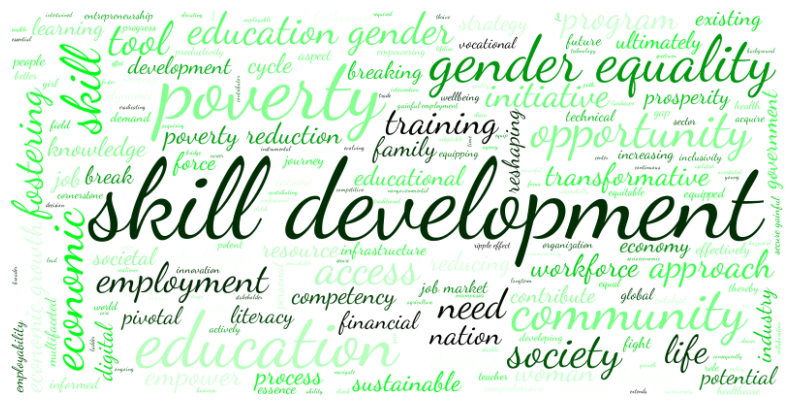

In [23]:
words = clean_text_problem.lower().split() # Splits the string into individual words
# Generating a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white',max_words = 200,font_path='DancingScript-VariableFont_wght.ttf').generate(clean_text_problem)
wordcloud.recolor(color_func = hsl_color_func) # applies a custom color function
plt.figure(figsize=(10,10)) # Creates a new figure for the plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show() # Displays the word cloud plot

# Masked Images

In [24]:
color = 'xkcd:jungle green'           
r,g,b = colors.to_rgb(color)        
h,l,s = colorsys.rgb_to_hls(r,g,b)
hsl_val = 'hsl(' + str(h*360) + ', 100%%, %d%%)'
def hsl_color_func(word, font_size, position, orientation, random_state = None, **kwargs):
    return(hsl_val % np.random.randint(0,100))

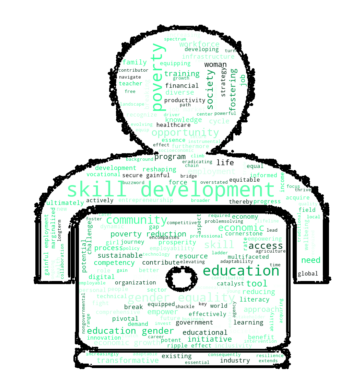

<Figure size 2000x2000 with 0 Axes>

In [25]:
no_poverty1 = np.array(Image.open("skill_development.jpg")) # Loading the image to be masked
# Generating a WordCloud object
wc = WordCloud(background_color="white", mask = no_poverty1, contour_width=5, 
               contour_color='black',color_func = hsl_color_func).generate(clean_text_problem)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")  # Turn off axis labels
plt.figure(figsize=(20,20)) # Creates a new figure for the plot
plt.show() # Displays the word cloud plot

In [26]:
color = 'xkcd:jungle green'           
r,g,b = colors.to_rgb(color)        
h,l,s = colorsys.rgb_to_hls(r,g,b)
hsl_val = 'hsl(' + str(h*360) + ', 100%%, %d%%)'
def hsl_color_func(word, font_size, position, orientation, random_state = None, **kwargs):
    return(hsl_val % np.random.randint(0,100))

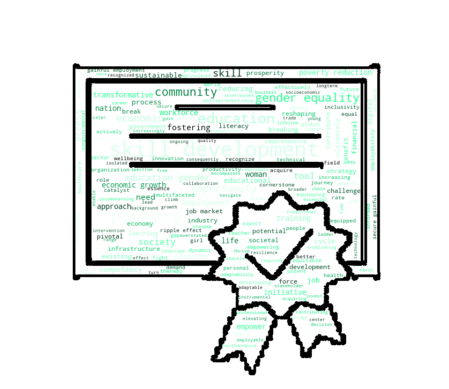

<Figure size 2000x2000 with 0 Axes>

In [27]:
no_poverty2 = np.array(Image.open("certificate.jpg")) # Loading the image to be masked
# Generating a WordCloud object
wc = WordCloud(background_color="white", mask = no_poverty2, contour_width=5, contour_color='black',color_func = hsl_color_func).generate(clean_text_problem)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")  # Turn off axis labels
plt.figure(figsize=(20,20)) # Creates a new figure for the plot
plt.show() # Displays the word cloud plot